<h1>City Simlarity Test </h1>
<h2>Business Problem</h2>
    
<p>
     A TATA, Wipro, New York Luxury Brand and other multi-national brands has built its business in several cities all over world. Due to its success and growing popularity in these cities, the CEO and his team wants to expand their business to other cities in the India, UK States, China, Japan and also explore their market in big cities in other countries. Now the CEO has hired a data scientist and assigned her a task to find out the similarity between different big cities in the world and group the cities into various clusters, so that the Board of Directors can make a better decision of which business mode to operate in new cities. </p>

<h2>Data Section</h2>
<p>We chose 29 most popular cities in the world and clustered them based on the three factors, venues distribution, GDP indicator, and climate types. The venues information is retrieved from FourSquare API and at most 500 venues were selected for each city, while the GDP information and climate type information are scaped from online Wikipedia pages.</p>

<h3>Import Necessary Libraries</h3>

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl

<h3>Set up a World City Dataframe</h3>
<p>The world city dataframe includes information of city names, their locations features, and their country names.</p>

In [6]:
## Create a dataframe of cities
City_data = {'City': ['New York', 'London','Edinburgh', 'Toronto', 'Sydney', 
                      'Singapore', 'Melbourne', 'Hong Kong', 'Los Angeles',
                      'Chicago', 'Boston', 'San Francisco', 'Dublin', 'Washington','Beijing',
                      'Shanghai','Guangzhou', 'Shenzhen', 'Mumbai', 'Tokyo', 'Seoul–Incheon','Moscow','Paris',
                      'Taipei', 'Berlin', 'Jakarta', 'Mexico City','Delhi','Kolkata']}
City_df = pd.DataFrame(City_data)

## add up columns of 'Lat', 'Lng', 'Country'
## For lar, and lng, we use zero values first for later data fill-in
City_df.insert(1, 'Latitude', np.zeros(29))
City_df.insert(2, 'Longitude', np.zeros(29))
City_df.insert(3, 'Country', ['US', 'UK', 'UK', 'Canada', 'Australia', 'Singapore', 'Australia', 'China',
                              'US', 'US', 'US', 'US', 'Ireland', 'US', 'China', 'China', 'China', 'China',
                              'India', 'Japan', 'South Korea', 'Russia', 'France', 'China', 'Germany', 'Indonesia', 'Mexico','India','India'])

In [10]:
City_df.iloc[0]

City         New York
Latitude            0
Longitude           0
Country            US
Name: 0, dtype: object

In [11]:
City_df.head(29)

,City,Latitude,Longitude,Country
0,New York,0.0,0.0,US
1,London,0.0,0.0,UK
2,Edinburgh,0.0,0.0,UK
3,Toronto,0.0,0.0,Canada
4,Sydney,0.0,0.0,Australia
5,Singapore,0.0,0.0,Singapore
6,Melbourne,0.0,0.0,Australia
7,Hong Kong,0.0,0.0,China
8,Los Angeles,0.0,0.0,US
9,Chicago,0.0,0.0,US


<h3>Add in Latitude & Longitude Values</h3>

In [12]:
## Import necessary libraries
import geopy
from geopy.geocoders import Nominatim

## use geolocation package to retrieve location features (lat & lng) into the dataframe 
for index, row in City_df.iterrows():
    city = row['City']
    geolocator = Nominatim(user_agent = "explorer2")
    location_city = geolocator.geocode(str(city))
    lat_city = location_city.latitude
    lng_city = location_city.longitude
    City_df.loc[index, 'Latitude'] = lat_city
    City_df.loc[index, 'Longitude'] = lng_city
    
City_df.head(29)

,City,Latitude,Longitude,Country
0,New York,40.712728,-74.006015,US
1,London,51.507322,-0.127647,UK
2,Edinburgh,55.953346,-3.188375,UK
3,Toronto,43.653482,-79.383935,Canada
4,Sydney,-33.854816,151.216454,Australia
5,Singapore,1.357107,103.819499,Singapore
6,Melbourne,-37.814218,144.963161,Australia
7,Hong Kong,22.279328,114.162813,China
8,Los Angeles,34.053691,-118.242767,US
9,Chicago,41.875562,-87.624421,US


<h3>Visualize Locations on World Map</h3>

In [13]:
## Install relevant packages for visualization
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                       

In [14]:
## import necessary lib
import folium

## create a world map
world_map = folium.Map()

## add location marks on the world map
for lati, lngi, city in zip(City_df['Latitude'], City_df['Longitude'], City_df['City']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lati, lngi],
        radius = 3,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.6,
        parse_html = False
    ).add_to(world_map)
    
world_map

<h3>Scrape Data</h3>
<p>We will collect and clean data of venues, GDP, and climates step by step in this section</p>

<h3>Retrive Venue Information for Cities</h3>
<p>We retrieve at most 500 venues information for each city and add venue names and venue categories to the dataframe</p>

In [15]:
## import necessary packages
import requests

## Client Information for Foursquare
CLIENT_ID = "YYZIJHKGABGQIHFD4SQH0RKMCD5E3JPUAIRCM1QLOANUILAU"
CLIENT_SECRET = "IQDDZ201VFA0XFRA2U1RKP30BDBYKL0XG42AXJ0LHKLTOPKX"
VERSION = '20190829'
LIMIT = 500

In [16]:
## Create a function to repeat process for all neighborhoods
def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        # create the API request URL
        url_city = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url_city).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return nearby_venues

In [13]:
cols=world_onehot.columns.to_list()
print(cols)

['Accessories Store', 'Adult Boutique', 'African Restaurant', 'American Restaurant', 'Amphitheater', 'Aquarium', 'Arcade', 'Arepa Restaurant', 'Argentinian Restaurant', 'Art Gallery', 'Art Museum', 'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports', 'Australian Restaurant', 'Austrian Restaurant', 'Auto Workshop', 'Awadhi Restaurant', 'BBQ Joint', 'Bagel Shop', 'Bakery', 'Bar', 'Baseball Stadium', 'Basketball Stadium', 'Bath House', 'Beach', 'Beach Bar', 'Bed & Breakfast', 'Beer Bar', 'Beer Garden', 'Beer Store', 'Beijing Restaurant', 'Belgian Restaurant', 'Bengali Restaurant', 'Bike Rental / Bike Share', 'Bistro', 'Board Shop', 'Boat or Ferry', 'Bookstore', 'Botanical Garden', 'Boutique', 'Boxing Gym', 'Brazilian Restaurant', 'Breakfast Spot', 'Brewery', 'Bridge', 'Bubble Tea Shop', 'Buddhist Temple', 'Buffet', 'Building', 'Bunsik Restaurant', 'Burger Joint', 'Burrito Place', 'Butcher', 'Cafeteria', 'Café', 'Cajun / Creole Restaurant', 'Canal', 'Candy Store', 'Cantonese Re

In [17]:
## Fill in the location inforation of cities into the function and return a segregated dataframe of venues for all cities
world_venues = getNearbyVenues(names = City_df['City'], latitudes = City_df['Latitude'], longitudes = City_df['Longitude'])
world_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,New York,40.712728,-74.006015,Korin,40.714824,-74.009404,Furniture / Home Store
1,New York,40.712728,-74.006015,Aire Ancient Baths,40.718141,-74.004941,Spa
2,New York,40.712728,-74.006015,9/11 Memorial North Pool,40.712077,-74.013187,Memorial Site
3,New York,40.712728,-74.006015,One World Trade Center,40.713069,-74.013133,Building
4,New York,40.712728,-74.006015,Washington Market Park,40.717046,-74.011095,Playground


In [18]:
## Check out the size of the dataset
world_venues.shape

(2898, 7)

<h3>Analysis for the Venue Distribution in Cities</h3>
<p>We will figure out the top 10 popular venues in each city for viewing</p>

In [20]:
## Apply onehot-coding to venue categories 
world_onehot = pd.get_dummies(world_venues['Venue Category'], prefix = "", prefix_sep= "")
world_onehot.head()

,Adult Boutique,American Restaurant,Amphitheater,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Wine Bar,Wine Shop,Winery,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
## Add city column back to dataframe
world_onehot[['City']] = world_venues[['City']]

# move city column to the first column
fixed_columns = [world_onehot.columns[-1]] + list(world_onehot.columns[:-1])
world_onehot_city = world_onehot[fixed_columns]

world_onehot_city.head()

,City,Adult Boutique,American Restaurant,Amphitheater,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Wine Bar,Wine Shop,Winery,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,New York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,New York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,New York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,New York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,New York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
## Group the dataset by the city names to check out the percentage of each venue categores 
world_grouped = world_onehot_city.groupby('City').mean().reset_index()
world_grouped.head()

,City,Adult Boutique,American Restaurant,Amphitheater,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Wine Bar,Wine Shop,Winery,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,Beijing,0.0,0.00,0.00,0.0,0.00,0.0,0.02,0.00,0.00,...,0.00,0.00,0.0,0.01,0.0,0.00,0.0,0.02,0.01,0.0
1,Berlin,0.0,0.00,0.00,0.0,0.00,0.0,0.01,0.00,0.02,...,0.02,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0
2,Boston,0.0,0.03,0.00,0.0,0.00,0.0,0.00,0.00,0.00,...,0.01,0.02,0.0,0.00,0.0,0.01,0.0,0.00,0.00,0.0
3,Chicago,0.0,0.01,0.01,0.0,0.00,0.0,0.00,0.01,0.00,...,0.00,0.00,0.0,0.00,0.0,0.02,0.0,0.00,0.00,0.0
4,Delhi,0.0,0.00,0.00,0.0,0.01,0.0,0.01,0.01,0.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0


In [23]:
## Define a function that sorts the values in rows

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
## create columns according to number of top venues
columns = ['City']
for ind in np.arange(10):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

## Create a dataframe
## set up the column names for the dataframe
City_venue_sorted = pd.DataFrame(columns = columns)

## set the column of "City" 
City_venue_sorted['City'] = world_grouped['City']

## Set the other column values -- the top 10 venue names
for ind in np.arange(world_grouped.shape[0]):
    City_venue_sorted.iloc[ind, 1:] = return_most_common_venues(world_grouped.iloc[ind, :], 10)

City_venue_sorted

,City,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beijing,Historic Site,Hotel,Park,Café,Shopping Mall,Brewery,Coffee Shop,Dumpling Restaurant,Temple,Cocktail Bar
1,Berlin,Park,Coffee Shop,Bookstore,Gourmet Shop,Ice Cream Shop,Monument / Landmark,Chocolate Shop,Hotel,Concert Hall,Bakery
2,Boston,Park,Bakery,Italian Restaurant,Seafood Restaurant,Salad Place,Gym,Gastropub,French Restaurant,Coffee Shop,Hotel
3,Chicago,Hotel,New American Restaurant,Coffee Shop,Park,Sandwich Place,Grocery Store,Donut Shop,Bar,Seafood Restaurant,Café
4,Delhi,Indian Restaurant,Hotel,Café,Lounge,Monument / Landmark,Deli / Bodega,Park,Bar,South Indian Restaurant,Coffee Shop
5,Dublin,Park,Café,Pub,Coffee Shop,Burger Joint,Plaza,Restaurant,Stadium,Ice Cream Shop,Historic Site
6,Edinburgh,Park,Coffee Shop,Café,Pub,Beer Bar,Hotel,Bar,Scenic Lookout,Cocktail Bar,Historic Site
7,Guangzhou,Hotel,Coffee Shop,Shopping Mall,Park,Turkish Restaurant,Cantonese Restaurant,Café,Electronics Store,Snack Place,Cocktail Bar
8,Hong Kong,Hotel,Italian Restaurant,Japanese Restaurant,Thai Restaurant,Bar,Chinese Restaurant,Café,Scenic Lookout,Gym / Fitness Center,Park
9,Jakarta,Hotel,Coffee Shop,Shopping Mall,Steakhouse,Indonesian Restaurant,Restaurant,Lounge,Bakery,Fast Food Restaurant,Clothing Store


<h3>Scrape Data of City GDP from Online</h3>
<p>We used the data available on the wikipedia page with a list of cities with ther GDP estimations in 2019. The data are released by Brookings Institution.</p>

In [25]:
## Import necessary lib
import pandas as pd
import requests
from bs4 import BeautifulSoup

## scrape datasets from website -- wikipedia page table
res = requests.get("https://en.wikipedia.org/wiki/List_of_cities_by_GDP")
soup = BeautifulSoup(res.content, 'lxml')
table = soup.find_all('table')[0]
City_GDP = pd.read_html(str(table))
City_GDP_dp = City_GDP[0][['City proper /Metropolitan area', 'Brookings Institution[5]2014 est.PPP-adjustedGDP ($BN)']]
City_GDP_dp.head()

,City proper /Metropolitan area,Brookings Institution[5]2014 est.PPP-adjustedGDP ($BN)
0,Aachen-Liège-Maastricht,99.7
1,Aberdeen,NaN
2,Abidjan,NaN
3,Abu Dhabi,178.3
4,Addis Ababa,NaN


In [26]:
## Change the column names for convenience
City_GDP_dp.columns = ['City', 'GDP']

## convert city names in world_grouped dataframe into a list
city_list = world_grouped['City'].tolist()

## Filter out data for relevant cities
gdp_filtered = []
for index, row in City_GDP_dp.iterrows():
    if row['City'] in city_list:
        gdp_filtered.append([row['City'], row['GDP']])

## print out city names that match >> turn out there are two cities that are not matched in the dataframe >> Seoul–Incheon & Washington
gdp_filtered

[['Beijing', '506.1'],
 ['Berlin', '157.7'],
 ['Boston', '360.1'],
 ['Chicago', '563.2'],
 ['Delhi', '293.6'],
 ['Dublin', '90.1'],
 ['Edinburgh', '32.5'],
 ['Guangzhou', '380.3'],
 ['Hong Kong', '416.0'],
 ['Jakarta', '321.3'],
 ['Kolkata', '150'],
 ['London', '835.7'],
 ['Los Angeles', '860.5'],
 ['Melbourne', '178.4'],
 ['Mexico City', '403.6'],
 ['Moscow', '553.3'],
 ['Mumbai', '150.9'],
 ['New York', '1403'],
 ['Paris', '715.1'],
 ['San Francisco', '331.0'],
 ['Shanghai', '594.0'],
 ['Shenzhen', '363.2'],
 ['Singapore', '365.9'],
 ['Sydney', '223.4'],
 ['Taipei', '327.3'],
 ['Tokyo', '1617'],
 ['Toronto', '276.3']]

In [27]:
## Add up the two cities -- Seoul–Incheon & Washington into the list
for index, row in City_GDP_dp.iterrows():
    if row['City'] in ['Washington, DC', 'Seoul']:
        gdp_filtered.append([row['City'], row['GDP']])

## Convert the list into a dataframe 
gdp_filtered_df = pd.DataFrame(gdp_filtered)
gdp_filtered_df.columns = ['City', 'GDP']

## drop repeated rows in the dataframe and convert GDP column into float
gdp_filtered_df = pd.DataFrame(gdp_filtered_df.drop_duplicates())
gdp_filtered_df['GDP'] = pd.to_numeric(gdp_filtered_df['GDP'])

In [28]:
gdp_filtered_df.shape

(29, 2)

In [30]:
gdp_filtered_df.head(29)

,City,GDP
0,Beijing,506.1
1,Berlin,157.7
2,Boston,360.1
3,Chicago,563.2
4,Delhi,293.6
5,Dublin,90.1
6,Edinburgh,32.5
7,Guangzhou,380.3
8,Hong Kong,416.0
9,Jakarta,321.3


<h3>Rank Cities in GDP Values</h3>

In [31]:
## Rank Cities in GDP values and sort values
gdp_filtered_sorted = gdp_filtered_df.sort_values('GDP', ascending = False)
gdp_filtered_sorted.head(10)

,City,GDP
25,Tokyo,1617.0
17,New York,1403.0
12,Los Angeles,860.5
27,Seoul,845.9
11,London,835.7
18,Paris,715.1
20,Shanghai,594.0
3,Chicago,563.2
15,Moscow,553.3
0,Beijing,506.1


In [32]:
## The last 5 cities in rank of GDP
gdp_filtered_sorted.tail(5)

,City,GDP
1,Berlin,157.7
16,Mumbai,150.9
10,Kolkata,150.0
5,Dublin,90.1
6,Edinburgh,32.5


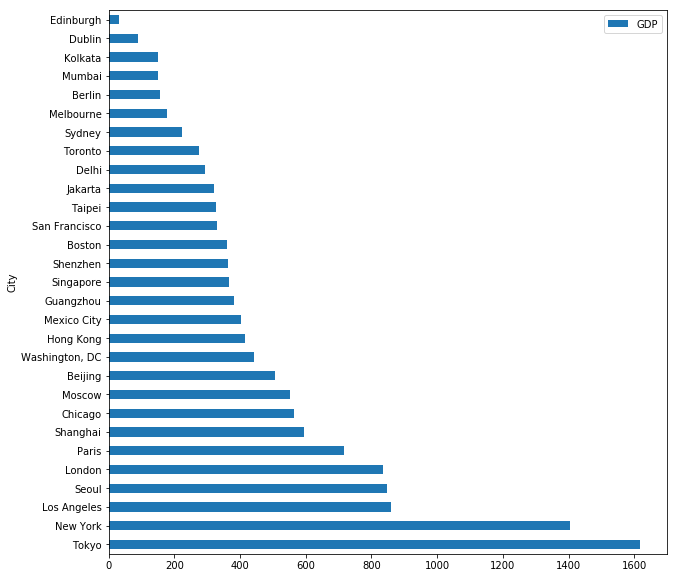

In [34]:
## Visualize the ranking with a bar chart
gdp_visualize = gdp_filtered_sorted
gdp_visualize = gdp_visualize.set_index('City')
import matplotlib as mpl
gdp_visualize.plot(kind = 'barh',
                        figsize = (10, 10))

In [35]:
## reset index for GDP dataset
gdp_filtered_sorted1 = gdp_filtered_sorted.reset_index().drop(['index'], axis = 1)

In [36]:
## import necessary libs
from sklearn import preprocessing

## Standardize datasets
scaler = preprocessing.StandardScaler()
gdp_array = np.array(gdp_filtered_sorted['GDP'])
gdp_normalized_array = preprocessing.normalize([gdp_array])

## add the normalized gdp back into the dataframe
gdp_column = pd.DataFrame(gdp_normalized_array).transpose()
gdp_filtered_sorted1.insert(1, 'Normalized GDP', gdp_column)
gdp_filtered_sorted1.head()

,City,Normalized GDP,GDP
0,Tokyo,0.506395,1617.0
1,New York,0.439377,1403.0
2,Los Angeles,0.269482,860.5
3,Seoul,0.264910,845.9
4,London,0.261716,835.7


In [37]:
## scrape datasets from website -- wikipedia page table
import requests
from bs4 import BeautifulSoup
import pandas as pd

## scrape data from the Wikipedia avergae temperature page
res1 = requests.get("https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature")
soup1 = BeautifulSoup(res1.content, 'lxml')

## scrape Asia table
table_Asia = soup1.find_all('table')[1]
Asia_temp = pd.read_html(str(table_Asia))[0]

## scrape Europe table
table_Europe = soup1.find_all('table')[2]
Europe_temp = pd.read_html(str(table_Europe))[0]

## scrape America table
table_America = soup1.find_all('table')[3]
America_temp = pd.read_html(str(table_America))[0]

## scrape Australia table
table_Australia = soup1.find_all('table')[4]
Australia_temp = pd.read_html(str(table_Australia))[0]

Australia_temp.tail()

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Ref.
21,New Zealand,Wellington,16.9(62.4),17.2(63.0),15.8(60.4),13.7(56.7),11.7(53.1),9.7(49.5),8.9(48.0),9.4(48.9),10.8(51.4),12.0(53.6),13.5(56.3),15.4(59.7),12.9(55.2),[347]
22,Papua New Guinea,Port Moresby,27.4(81.3),27.3(81.1),27.1(80.8),27.0(80.6),26.9(80.4),26.1(79.0),25.7(78.3),26.1(79.0),26.5(79.7),27.5(81.5),27.6(81.7),27.8(82.0),26.9(80.4),[348]
23,Solomon Islands,Honiara,26.7(80.1),26.6(79.9),26.6(79.9),26.5(79.7),26.6(79.9),26.4(79.5),26.1(79.0),26.2(79.2),26.5(79.7),26.5(79.7),26.7(80.1),26.8(80.2),26.5(79.7),[349]
24,United States,Honolulu,22.9(73.2),22.9(73.2),23.7(74.7),24.6(76.3),25.6(78.1),26.8(80.2),27.4(81.3),27.8(82.0),27.6(81.7),26.8(80.2),25.4(77.7),23.8(74.8),25.4(77.7),[350]
25,Vanuatu,Port Vila,26.4(79.5),26.5(79.7),26.3(79.3),25.3(77.5),24.1(75.4),23.0(73.4),22.1(71.8),22.0(71.6),22.7(72.9),23.4(74.1),24.6(76.3),25.7(78.3),24.3(75.7),[351]


In [46]:
## set up a list to store relevant data
temp_list = []

## Filter out data for relevant cities >> in Asia
for index, row in Asia_temp.iterrows():
    if row['City'] in city_list:
        temp_list.append([row['City'], row['Year']])

## Filter out data for relevant cities >> in Europe
for index, row in Europe_temp.iterrows():
    if row['City'] in city_list:
        temp_list.append([row['City'], row['Year']])       
 
 ## Filter out data for relevant cities >> in America
for index, row in America_temp.iterrows():
    if row['City'] in city_list:
        temp_list.append([row['City'], row['Year']])  

## Filter out data for relevant cities >> in Australia
for index, row in Australia_temp.iterrows():
    if row['City'] in city_list:
        temp_list.append([row['City'], row['Year']])  

## check if data for all cities are successfully extracted
len(temp_list)

22

In [47]:
## check out which cities are missing
temp_list

[['Beijing', '12.9(55.2)'],
 ['Shanghai', '16.7(62.1)'],
 ['Hong Kong', '23.3(73.9)'],
 ['Kolkata', '26.7(80.1)'],
 ['Mumbai', '27.1(80.8)'],
 ['Jakarta', '26.7(80.1)'],
 ['Tokyo', '15.4(59.7)'],
 ['Singapore', '27(81)'],
 ['Taipei', '23.0(73.4)'],
 ['Paris', '12.3(54.1)'],
 ['Berlin', '10.3(50.5)'],
 ['Dublin', '9.8(49.6)'],
 ['Moscow', '5.8(42.4)'],
 ['Edinburgh', '9.3(48.7)'],
 ['London', '10.3(50.5)'],
 ['Toronto', '9.4(48.9)'],
 ['Mexico City', '17.5(63.5)'],
 ['Boston', '10.9(51.7)'],
 ['Chicago', '9.8(49.7)'],
 ['Los Angeles', '18.6(65.4)'],
 ['Melbourne', '15.1(59.2)'],
 ['Sydney', '17.7(63.9)']]

In [48]:
## add up the missing cities
## Seoul
for index, row in Asia_temp.iterrows():
    if row['City'] in ['Seoul']:
        temp_list.append(['Seoul–Incheon', row['Year']])
        
## Washington,D.C., San Francisco, New York City
for index, row in America_temp.iterrows():
    if row['City'] in ['New York City' ]:
        temp_list.append(['New York', row['Year']])  
        
## Manually add up the rest from online sources
temp_list.append(['San Francisco', '14.6()'])
temp_list.append(['Washinton DC', '14.6()'])
temp_list.append(['Shenzhen', '22.9()'])
temp_list.append(['Guangzhou', '22.2()'])
temp_list.append(['Delhi', '29.2()'])
        
len(temp_list)

29

In [49]:
## convert temp_list into a dataframe
temp_df = pd.DataFrame(temp_list)
temp_df.columns = ['City', 'Temperature']

## drop out the F temp in the ()
for index, row in temp_df.iterrows():
    row['Temperature'] = row['Temperature'].split('(')[0]

## convert temperature values into int
temp_df['Temperature'] = pd.to_numeric(temp_df['Temperature'])

temp_df.head()

,City,Temperature
0,Beijing,12.9
1,Shanghai,16.7
2,Hong Kong,23.3
3,Kolkata,26.7
4,Mumbai,27.1


<h3>Rank Cities in Temperature Values</h3>

In [50]:
## Rank Cities in Temperature values and sort values
temp_sorted = temp_df.sort_values('Temperature', ascending = False)
temp_sorted.head(10)

,City,Temperature
28,Delhi,29.2
4,Mumbai,27.1
7,Singapore,27.0
3,Kolkata,26.7
5,Jakarta,26.7
2,Hong Kong,23.3
8,Taipei,23.0
26,Shenzhen,22.9
27,Guangzhou,22.2
19,Los Angeles,18.6


In [51]:
## The last 10 cities in rank of tempature
temp_sorted.tail(10)

,City,Temperature
22,Seoul–Incheon,12.5
9,Paris,12.3
17,Boston,10.9
10,Berlin,10.3
14,London,10.3
18,Chicago,9.8
11,Dublin,9.8
15,Toronto,9.4
13,Edinburgh,9.3
12,Moscow,5.8


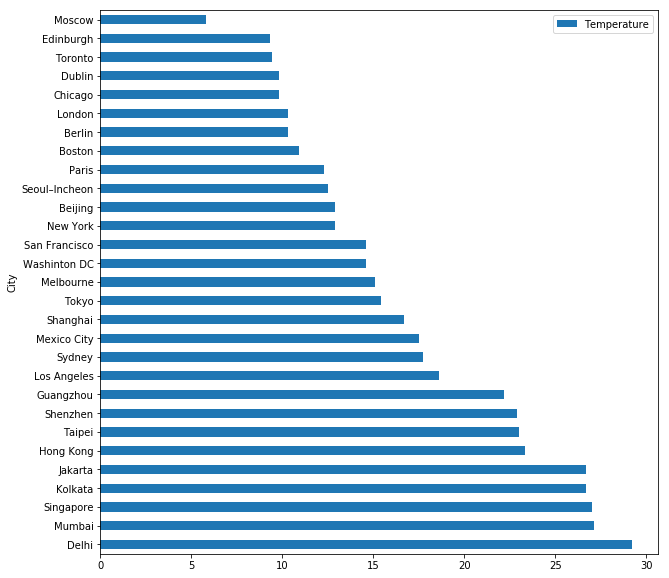

In [52]:
## Visualize the ranking with a bar chart
temp_visualize = temp_sorted
temp_visualize = temp_visualize.set_index('City')
temp_visualize.plot(kind = 'barh',
                   figsize = (10, 10))

<h3>Normalize Temperature data for modeling</h3>

In [53]:
## reset index for Temperature dataset
temp_sorted = temp_sorted.reset_index().drop(['index'], axis = 1)

In [54]:
## Standardize datasets
scaler_temp = preprocessing.StandardScaler()
temp_array = np.array(temp_sorted['Temperature'])
temp_normalized_array = preprocessing.normalize([temp_array])

## add the normalized gdp back into the dataframe
temp_column = pd.DataFrame(temp_normalized_array).transpose()
temp_sorted.insert(1, 'Normalized Temperature', temp_column)
temp_sorted.head()

,City,Normalized Temperature,Temperature
0,Delhi,0.302161,29.2
1,Mumbai,0.280430,27.1
2,Singapore,0.279395,27.0
3,Kolkata,0.276291,26.7
4,Jakarta,0.276291,26.7


<h3>Merge All Features -- Venue Distribution, GDP & Climate</h3>
<p>We will merge all data into one dataframe for convenience</p>

In [55]:
## make sure the city names are the same
gdp_filtered_sorted1= gdp_filtered_sorted1.replace('Seoul-Incheon', 'Seoul')
gdp_filtered_sorted1 = gdp_filtered_sorted1.replace('Washington, DC', 'Washington')
temp_sorted = temp_sorted.replace('Washinton DC', 'Washington')
temp_sorted = temp_sorted.replace('Seoul–Incheon', 'Seoul')
world_grouped = world_grouped.replace('Seoul–Incheon', 'Seoul')

In [56]:
## merge GDP data
world_merged_cluster = world_grouped
world_merged_cluster = world_merged_cluster.join(gdp_filtered_sorted1.set_index('City'), on = 'City')

# merge Temperature data
world_merged_cluster = world_merged_cluster.join(temp_sorted.set_index('City'), on = 'City')
world_merged_cluster.head()

,City,Adult Boutique,American Restaurant,Amphitheater,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo,Normalized GDP,GDP,Normalized Temperature,Temperature
0,Beijing,0.0,0.00,0.00,0.0,0.00,0.0,0.02,0.00,0.00,...,0.0,0.00,0.0,0.02,0.01,0.0,0.158495,506.1,0.133489,12.9
1,Berlin,0.0,0.00,0.00,0.0,0.00,0.0,0.01,0.00,0.02,...,0.0,0.00,0.0,0.00,0.00,0.0,0.049387,157.7,0.106584,10.3
2,Boston,0.0,0.03,0.00,0.0,0.00,0.0,0.00,0.00,0.00,...,0.0,0.01,0.0,0.00,0.00,0.0,0.112772,360.1,0.112793,10.9
3,Chicago,0.0,0.01,0.01,0.0,0.00,0.0,0.00,0.01,0.00,...,0.0,0.02,0.0,0.00,0.00,0.0,0.176377,563.2,0.101410,9.8
4,Delhi,0.0,0.00,0.00,0.0,0.01,0.0,0.01,0.01,0.00,...,0.0,0.00,0.0,0.00,0.00,0.0,0.091947,293.6,0.302161,29.2


In [57]:
## Drop GDP and Temperature columns
world_merged_cluster = world_merged_cluster.drop(['GDP', 'Temperature'], axis = 1)
world_merged_cluster.head()

,City,Adult Boutique,American Restaurant,Amphitheater,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Winery,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo,Normalized GDP,Normalized Temperature
0,Beijing,0.0,0.00,0.00,0.0,0.00,0.0,0.02,0.00,0.00,...,0.0,0.01,0.0,0.00,0.0,0.02,0.01,0.0,0.158495,0.133489
1,Berlin,0.0,0.00,0.00,0.0,0.00,0.0,0.01,0.00,0.02,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.049387,0.106584
2,Boston,0.0,0.03,0.00,0.0,0.00,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,0.01,0.0,0.00,0.00,0.0,0.112772,0.112793
3,Chicago,0.0,0.01,0.01,0.0,0.00,0.0,0.00,0.01,0.00,...,0.0,0.00,0.0,0.02,0.0,0.00,0.00,0.0,0.176377,0.101410
4,Delhi,0.0,0.00,0.00,0.0,0.01,0.0,0.01,0.01,0.00,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.091947,0.302161


<h3>Add weights to different factors</h3>
<p>In order for different factors to be weighted diferently in the model, we will adjust the scale for normalized GDP and normalized temperature. We will assign 2 times to normalized GDP and 2 times to normalized Temperature</p>

In [58]:
## 10 times to normalized GDP
world_merged_cluster['Normalized GDP'] = world_merged_cluster['Normalized GDP']*1.5
world_merged_cluster['Normalized Temperature'] = world_merged_cluster['Normalized Temperature']*1.5
world_merged_cluster

,City,Adult Boutique,American Restaurant,Amphitheater,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Winery,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo,Normalized GDP,Normalized Temperature
0,Beijing,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,...,0.00,0.01,0.00,0.00,0.00,0.02,0.01,0.000000,0.237743,0.200233
1,Berlin,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.02,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.074080,0.159876
2,Boston,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.000000,0.169158,0.169189
3,Chicago,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.00,...,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.000000,0.264565,0.152115
4,Delhi,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.137920,0.453241
5,Dublin,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.010000,0.042325,0.152115
6,Edinburgh,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.015267,0.144354
7,Guangzhou,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.178647,0.344587
8,Hong Kong,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,...,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.010000,0.195418,0.361662
9,Jakarta,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.150932,0.414436


<h3>Set Up and Train the Model</h3>
<p>We will use the onehot-coded grouped data to fit a kmeans clustering model</p>

In [59]:
## Drop out the city column of the grouped data for model training
world_grouped_clustering = world_merged_cluster.drop(['City'], axis = 1)

## import machine learning packages
import sklearn
from sklearn.cluster import KMeans

## Create and fit a kmeans model 
model_kmeans = KMeans(n_clusters = 6, random_state = 0)
model_kmeans.fit(world_grouped_clustering)

## Check out the labels
kmeans_labels = model_kmeans.labels_
kmeans_labels

array([1, 3, 3, 1, 0, 3, 3, 2, 2, 2, 0, 1, 5, 3, 3, 1, 0, 4, 1, 3, 5, 2,
       2, 2, 3, 2, 4, 3, 1], dtype=int32)

<h3>Update the Dataframe with Cluster Labels and Location Features</h3>
<p>We will add the cluster labels to the dataframe -- City_venue_sorted</p>

In [60]:
## Add Clustering labels 
City_venue_sorted.insert(0, 'Cluster Labels', kmeans_labels)
City_venue_sorted.head()

,Cluster Labels,City,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Beijing,Historic Site,Hotel,Park,Café,Shopping Mall,Brewery,Coffee Shop,Dumpling Restaurant,Temple,Cocktail Bar
1,3,Berlin,Park,Coffee Shop,Bookstore,Gourmet Shop,Ice Cream Shop,Monument / Landmark,Chocolate Shop,Hotel,Concert Hall,Bakery
2,3,Boston,Park,Bakery,Italian Restaurant,Seafood Restaurant,Salad Place,Gym,Gastropub,French Restaurant,Coffee Shop,Hotel
3,1,Chicago,Hotel,New American Restaurant,Coffee Shop,Park,Sandwich Place,Grocery Store,Donut Shop,Bar,Seafood Restaurant,Café
4,0,Delhi,Indian Restaurant,Hotel,Café,Lounge,Monument / Landmark,Deli / Bodega,Park,Bar,South Indian Restaurant,Coffee Shop


In [61]:
## Check out the shape of the City_venue_sorted
City_venue_sorted.shape

(29, 12)

In [62]:
## Check out the shape of the Toronto_selected
City_df.shape

(29, 4)

In [63]:
## Since the two dataframes have the same shape, we can merge them on the Postal Code
City_venue_sorted = City_venue_sorted.replace('Seoul–Incheon', 'Seoul')
world_merged = City_df
world_merged = world_merged.replace('Seoul–Incheon', 'Seoul')
world_merged = world_merged.join(City_venue_sorted.set_index('City'), on = 'City')

world_merged

,City,Latitude,Longitude,Country,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New York,40.712728,-74.006015,US,4,Park,Bookstore,Ice Cream Shop,Gourmet Shop,Bakery,Movie Theater,Scenic Lookout,Pier,Furniture / Home Store,Sandwich Place
1,London,51.507322,-0.127647,UK,1,Hotel,Cocktail Bar,Park,Art Gallery,Art Museum,Coffee Shop,Theater,Lounge,Department Store,Hotel Bar
2,Edinburgh,55.953346,-3.188375,UK,3,Park,Coffee Shop,Café,Pub,Beer Bar,Hotel,Bar,Scenic Lookout,Cocktail Bar,Historic Site
3,Toronto,43.653482,-79.383935,Canada,3,Coffee Shop,Park,Bakery,Café,Mexican Restaurant,Hotel,Vegetarian / Vegan Restaurant,Sandwich Place,Farmers Market,Diner
4,Sydney,-33.854816,151.216454,Australia,3,Park,Café,Scenic Lookout,Coffee Shop,Theater,Bakery,Pizza Place,Ice Cream Shop,Garden,Hotel
5,Singapore,1.357107,103.819499,Singapore,2,Hotel,Japanese Restaurant,Ice Cream Shop,Shopping Mall,Park,Italian Restaurant,Clothing Store,Dessert Shop,Greek Restaurant,Chinese Restaurant
6,Melbourne,-37.814218,144.963161,Australia,3,Café,Coffee Shop,Park,Bar,Ice Cream Shop,Cocktail Bar,Wine Bar,Plaza,Asian Restaurant,Monument / Landmark
7,Hong Kong,22.279328,114.162813,China,2,Hotel,Italian Restaurant,Japanese Restaurant,Thai Restaurant,Bar,Chinese Restaurant,Café,Scenic Lookout,Gym / Fitness Center,Park
8,Los Angeles,34.053691,-118.242767,US,5,Coffee Shop,Taco Place,Brewery,Art Gallery,Food Truck,American Restaurant,Sushi Restaurant,Theater,Italian Restaurant,Bakery
9,Chicago,41.875562,-87.624421,US,1,Hotel,New American Restaurant,Coffee Shop,Park,Sandwich Place,Grocery Store,Donut Shop,Bar,Seafood Restaurant,Café


<h3>Visualize the Cluster Results on the Map</h3>
<p>We will visualize the map with different clusters results with different colors</p>

In [64]:
## import necessary lib and packages
import matplotlib.cm as cm
import matplotlib.colors as colors

## Create map
map_clusters = folium.Map()

## set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, city, country,cluster in zip(world_merged['Latitude'], world_merged['Longitude'], world_merged['City'], world_merged['Country'],world_merged['Cluster Labels']):
    label = folium.Popup(str(city) + ',' + str(country) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

<h2>Conlusion</h2>
<p>Based on the analysis above, a total of 27 cities were clustered into 5 groups and the Board of Directors can make an informed decision based on this result. Let's have a look at which cities are more similar than others</p>

<h3>Cluster 0</h3>

In [69]:
## Filter out the cluster 0 cities and change the column name to cluster 0
Cluster0 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 0][['City', 'Country']])
Cluster0.columns = ['City', 'Country']
Cluster0 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 0][['City', 'Country']]).replace('Seoul–Incheon','Seoul')
Cluster0.columns = ['City', 'Country']
Cluster0 = Cluster0.join(City_venue_sorted.set_index('City'), on = 'City')
Cluster0 = Cluster0.join(gdp_filtered_sorted1.set_index('City'), on = 'City')
Cluster0 = Cluster0.join(temp_sorted.set_index('City'), on = 'City')
Cluster0

,City,Country,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Normalized GDP,GDP,Normalized Temperature,Temperature
18,Mumbai,India,0,Indian Restaurant,Hotel,Café,Lounge,Fast Food Restaurant,Cricket Ground,Dessert Shop,Scenic Lookout,Ice Cream Shop,Restaurant,0.047257,150.9,0.280430,27.1
27,Delhi,India,0,Indian Restaurant,Hotel,Café,Lounge,Monument / Landmark,Deli / Bodega,Park,Bar,South Indian Restaurant,Coffee Shop,0.091947,293.6,0.302161,29.2
28,Kolkata,India,0,Chinese Restaurant,Hotel,Café,Shopping Mall,Indian Restaurant,Indian Sweet Shop,Dhaba,Bookstore,Mughlai Restaurant,Multiplex,0.046975,150.0,0.276291,26.7


In [70]:
Cluster0.shape

(3, 17)

<p>These 3 cities are all located in the southern Asian areas and in India with similar climates and temperatures. Their GDP are close too and are lower than those of the cluster 1 cities. 6 of them have hotel as the most common venue and coffee shops/cafe are very popular too. This shows that tourism might be an essential source of income for these cities</p>

## Cluster 1

In [71]:
## Filter out the cluster 1 cities and change the column name to cluster 1
City_venue_sorted = City_venue_sorted.replace('Seoul–Incheon', 'Seoul')
Cluster1 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 1][['City', 'Country']]).replace('Seoul–Incheon','Seoul')
Cluster1.columns = ['City', 'Country']
Cluster1 = Cluster1.join(City_venue_sorted.set_index('City'), on = 'City')
Cluster1 = Cluster1.join(gdp_filtered_sorted1.set_index('City'), on = 'City')
Cluster1 = Cluster1.join(temp_sorted.set_index('City'), on = 'City')
Cluster1

,City,Country,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Normalized GDP,GDP,Normalized Temperature,Temperature
1,London,UK,1,Hotel,Cocktail Bar,Park,Art Gallery,Art Museum,Coffee Shop,Theater,Lounge,Department Store,Hotel Bar,0.261716,835.7,0.106584,10.3
9,Chicago,US,1,Hotel,New American Restaurant,Coffee Shop,Park,Sandwich Place,Grocery Store,Donut Shop,Bar,Seafood Restaurant,Café,0.176377,563.2,0.101410,9.8
13,Washington,US,1,Monument / Landmark,Art Museum,Hotel,Park,History Museum,Ice Cream Shop,Coffee Shop,Garden,Theater,American Restaurant,0.138483,442.2,0.151080,14.6
14,Beijing,China,1,Historic Site,Hotel,Park,Café,Shopping Mall,Brewery,Coffee Shop,Dumpling Restaurant,Temple,Cocktail Bar,0.158495,506.1,0.133489,12.9
21,Moscow,Russia,1,Park,Café,Restaurant,Supermarket,Hotel,Convenience Store,Rest Area,Housing Development,Stables,Soccer Field,0.173277,553.3,0.060018,5.8
22,Paris,France,1,Plaza,French Restaurant,Hotel,Wine Bar,Art Museum,Bakery,Fountain,Italian Restaurant,Garden,Restaurant,0.223947,715.1,0.127280,12.3


In [72]:

# Count how many cities in cluster 1
Cluster1.shape

(6, 17)

These 6 cities are from all across the world. One common feature among them is that theaters are pretty popular in these cities. London, Chicago, and Moscow are four out of three cities among all with theaters in the top 3 most common venues, and they all have developed arts and entertainment industries. Besides, Hotels are popular in these cities and all 6 cities all have close GDP, which is nearly 2 times higher than that of cluster 0 cities. However, their climates are pretty different.

<h3>Cluster 2</h3>

In [73]:
## Filter out the cluster 2 cities and change the column name to cluster 2
Cluster2 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 2][['City', 'Country']])
Cluster2.columns = ['City', 'Country']
Cluster2 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 2][['City', 'Country']]).replace('Seoul–Incheon','Seoul')
Cluster2.columns = ['City', 'Country']
Cluster2 = Cluster2.join(City_venue_sorted.set_index('City'), on = 'City')
Cluster2 = Cluster2.join(gdp_filtered_sorted1.set_index('City'), on = 'City')
Cluster2 = Cluster2.join(temp_sorted.set_index('City'), on = 'City')
Cluster2

,City,Country,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Normalized GDP,GDP,Normalized Temperature,Temperature
5,Singapore,Singapore,2,Hotel,Japanese Restaurant,Ice Cream Shop,Shopping Mall,Park,Italian Restaurant,Clothing Store,Dessert Shop,Greek Restaurant,Chinese Restaurant,0.114589,365.9,0.279395,27.0
7,Hong Kong,China,2,Hotel,Italian Restaurant,Japanese Restaurant,Thai Restaurant,Bar,Chinese Restaurant,Café,Scenic Lookout,Gym / Fitness Center,Park,0.130278,416.0,0.241108,23.3
15,Shanghai,China,2,Hotel,Coffee Shop,Shopping Mall,Bakery,Dumpling Restaurant,Spa,Gym / Fitness Center,Italian Restaurant,Hotpot Restaurant,Restaurant,0.186023,594.0,0.172811,16.7
16,Guangzhou,China,2,Hotel,Coffee Shop,Shopping Mall,Park,Turkish Restaurant,Cantonese Restaurant,Café,Electronics Store,Snack Place,Cocktail Bar,0.119098,380.3,0.229725,22.2
17,Shenzhen,China,2,Hotel,Shopping Mall,Coffee Shop,Electronics Store,Café,Park,Chinese Restaurant,Bar,Hotpot Restaurant,New American Restaurant,0.113743,363.2,0.236969,22.9
23,Taipei,China,2,Hotel,Bakery,Café,Noodle House,Dumpling Restaurant,Dessert Shop,Chinese Restaurant,Taiwanese Restaurant,Bookstore,Park,0.102500,327.3,0.238003,23.0
25,Jakarta,Indonesia,2,Hotel,Coffee Shop,Shopping Mall,Steakhouse,Indonesian Restaurant,Restaurant,Lounge,Bakery,Fast Food Restaurant,Clothing Store,0.100621,321.3,0.276291,26.7


<p>in this cluster, 5 cities from China out of 7. Their popular venues include Hotel,Coffee shops, Chinese Restaurant, which shows people in these cities are enjoying a rather slowly-paced life. These cities have a similar GDP too, which is slightly higher than that of cluster 0 </p>

<h3>Cluster 3</h3>

In [74]:
## Filter out the cluster 3 cities and change the column name to cluster 3
Cluster3 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 3][['City', 'Country']])
Cluster3.columns = ['City', 'Country']
Cluster3 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 3][['City', 'Country']]).replace('Seoul–Incheon','Seoul')
Cluster3.columns = ['City', 'Country']
Cluster3 = Cluster3.join(City_venue_sorted.set_index('City'), on = 'City')
Cluster3 = Cluster3.join(gdp_filtered_sorted1.set_index('City'), on = 'City')
Cluster3 = Cluster3.join(temp_sorted.set_index('City'), on = 'City')
Cluster3

,City,Country,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Normalized GDP,GDP,Normalized Temperature,Temperature
2,Edinburgh,UK,3,Park,Coffee Shop,Café,Pub,Beer Bar,Hotel,Bar,Scenic Lookout,Cocktail Bar,Historic Site,0.010178,32.5,0.096236,9.3
3,Toronto,Canada,3,Coffee Shop,Park,Bakery,Café,Mexican Restaurant,Hotel,Vegetarian / Vegan Restaurant,Sandwich Place,Farmers Market,Diner,0.086529,276.3,0.097271,9.4
4,Sydney,Australia,3,Park,Café,Scenic Lookout,Coffee Shop,Theater,Bakery,Pizza Place,Ice Cream Shop,Garden,Hotel,0.069962,223.4,0.183159,17.7
6,Melbourne,Australia,3,Café,Coffee Shop,Park,Bar,Ice Cream Shop,Cocktail Bar,Wine Bar,Plaza,Asian Restaurant,Monument / Landmark,0.055869,178.4,0.156254,15.1
10,Boston,US,3,Park,Bakery,Italian Restaurant,Seafood Restaurant,Salad Place,Gym,Gastropub,French Restaurant,Coffee Shop,Hotel,0.112772,360.1,0.112793,10.9
11,San Francisco,US,3,Park,Coffee Shop,Bakery,Ice Cream Shop,Grocery Store,Pizza Place,Gym,New American Restaurant,Marijuana Dispensary,Yoga Studio,0.103659,331.0,0.151080,14.6
12,Dublin,Ireland,3,Park,Café,Pub,Coffee Shop,Burger Joint,Plaza,Restaurant,Stadium,Ice Cream Shop,Historic Site,0.028217,90.1,0.101410,9.8
24,Berlin,Germany,3,Park,Coffee Shop,Bookstore,Gourmet Shop,Ice Cream Shop,Monument / Landmark,Chocolate Shop,Hotel,Concert Hall,Bakery,0.049387,157.7,0.106584,10.3
26,Mexico City,Mexico,3,Ice Cream Shop,Park,Art Museum,Bakery,Coffee Shop,Hotel,Mexican Restaurant,Taco Place,Asian Restaurant,Public Art,0.126395,403.6,0.181089,17.5


In [75]:
# Count how many cities in cluster 3
Cluster3.shape

(9, 17)

This cluster  has 9 cities, There coffee shops,Bakery,Pub and Cafe are the most famous.

<h3>Cluster 4</h3>


In [76]:
## Filter out the cluster 4 cities and change the column name to cluster 4
Cluster4 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 4][['City', 'Country']])
Cluster4.columns = ['City', 'Country']
Cluster4 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 4][['City', 'Country']]).replace('Seoul–Incheon','Seoul')
Cluster4 = Cluster4.join(City_venue_sorted.set_index('City'), on = 'City')
Cluster4 = Cluster4.join(gdp_filtered_sorted1.set_index('City'), on = 'City')
Cluster4 = Cluster4.join(temp_sorted.set_index('City'), on = 'City')
Cluster4

,City,Country,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Normalized GDP,GDP,Normalized Temperature,Temperature
0,New York,US,4,Park,Bookstore,Ice Cream Shop,Gourmet Shop,Bakery,Movie Theater,Scenic Lookout,Pier,Furniture / Home Store,Sandwich Place,0.439377,1403.0,0.133489,12.9
19,Tokyo,Japan,4,Hotel,Art Museum,Chinese Restaurant,Ramen Restaurant,Wagashi Place,Tonkatsu Restaurant,Coffee Shop,Sake Bar,Garden,BBQ Joint,0.506395,1617.0,0.159359,15.4


In [77]:
Cluster4.shape

(2, 17)

In this cluster has only 2 cities .These two cities have very different culture so setting business their will be having individual risks

<h3>Cluster 5</h3>

In [79]:
## Filter out the cluster 5 cities and change the column name to cluster 5
Cluster5 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 5][['City', 'Country']])
Cluster5.columns = ['City', 'Country']
Cluster5 = pd.DataFrame(world_merged[world_merged['Cluster Labels'] == 5][['City', 'Country']]).replace('Seoul–Incheon','Seoul')
Cluster5 = Cluster5.join(City_venue_sorted.set_index('City'), on = 'City')
Cluster5 = Cluster5.join(gdp_filtered_sorted1.set_index('City'), on = 'City')
Cluster5 = Cluster5.join(temp_sorted.set_index('City'), on = 'City')
Cluster5

,City,Country,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Normalized GDP,GDP,Normalized Temperature,Temperature
8,Los Angeles,US,5,Coffee Shop,Taco Place,Brewery,Art Gallery,Food Truck,American Restaurant,Sushi Restaurant,Theater,Italian Restaurant,Bakery,0.269482,860.5,0.192472,18.6
20,Seoul,South Korea,5,Coffee Shop,Park,Korean Restaurant,Market,BBQ Joint,Multiplex,Bakery,Fast Food Restaurant,Café,Golf Course,0.264910,845.9,0.129350,12.5


In this cluster has only two cities one from US and other from korean country having totally different lifestyles.There coffee shops ,Bakery and Fast food Restaurant are famous and can be established in order to gain profit if qualities are much better than others.